In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [ ]:
# create known parameters to test linear regression
weight = 0.6
bias = 0.2

#Make the data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train)

40

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

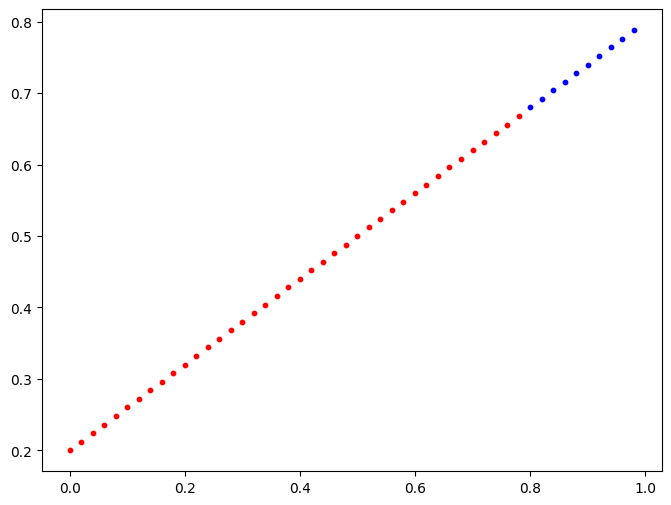

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


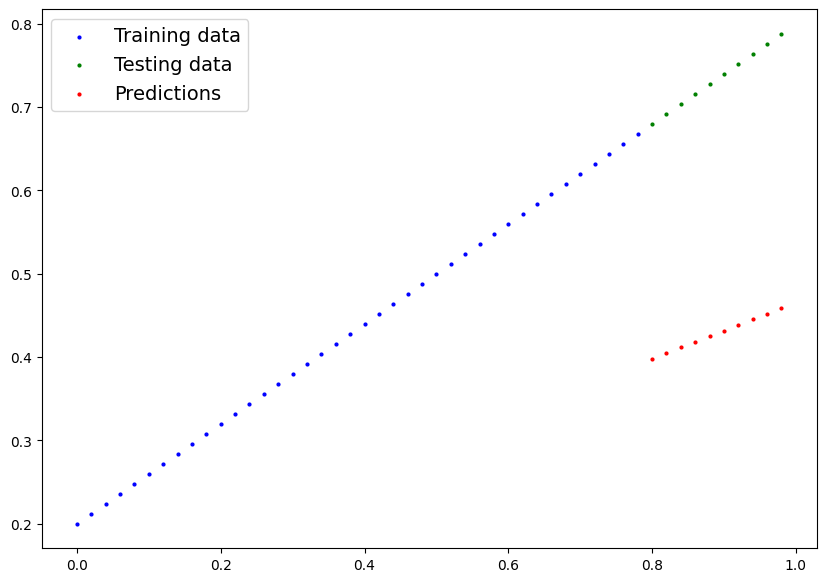

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.2818],
        [0.2871],
        [0.2924],
        [0.2976],
        [0.3029],
        [0.3082],
        [0.3134],
        [0.3187],
        [0.3240],
        [0.3292]])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200

#Create the lists of losses to plot later
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Train it
  model_0.train()
  y_pred = model_0(X_train)

  # Calculate the training loss
  loss = loss_fn(y_pred, y_train)

  # Zero the gradient of the optimizer
  optimizer.zero_grad()

  # loss backwards
  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.01018423680216074 | MAE Test Loss: 0.023353051394224167 
Epoch: 20 | MAE Train Loss: 0.0033175654243677855 | MAE Test Loss: 0.006808096077293158 
Epoch: 40 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 60 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 80 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 100 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 120 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 140 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 160 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 
Epoch: 180 | MAE Train Loss: 0.00654077623039484 | MAE Test Loss: 0.003275567200034857 


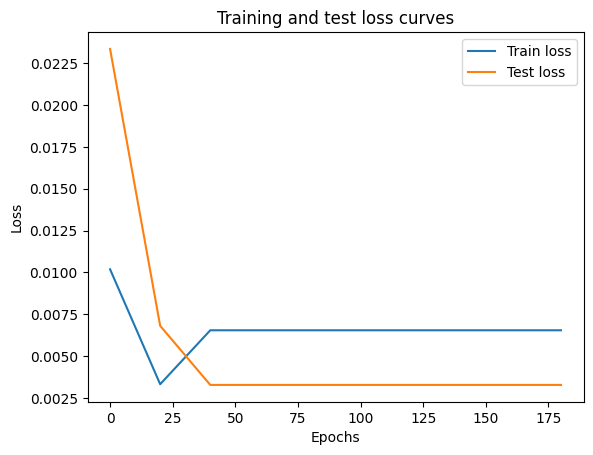

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5927])), ('bias', tensor([0.1963]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.2


In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.6705],
        [0.6823],
        [0.6942],
        [0.7060],
        [0.7179],
        [0.7297],
        [0.7416],
        [0.7534],
        [0.7653],
        [0.7771]])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5927])), ('bias', tensor([0.1963]))])

In [ ]:
# PyTorch inference rules!

#1. Put the model into evaluation mode
model_0.eval()

# Use the inference mode context manager to make predictions
with torch.inference_mode():
  model_preds = model_0(X_test)

y_preds == model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

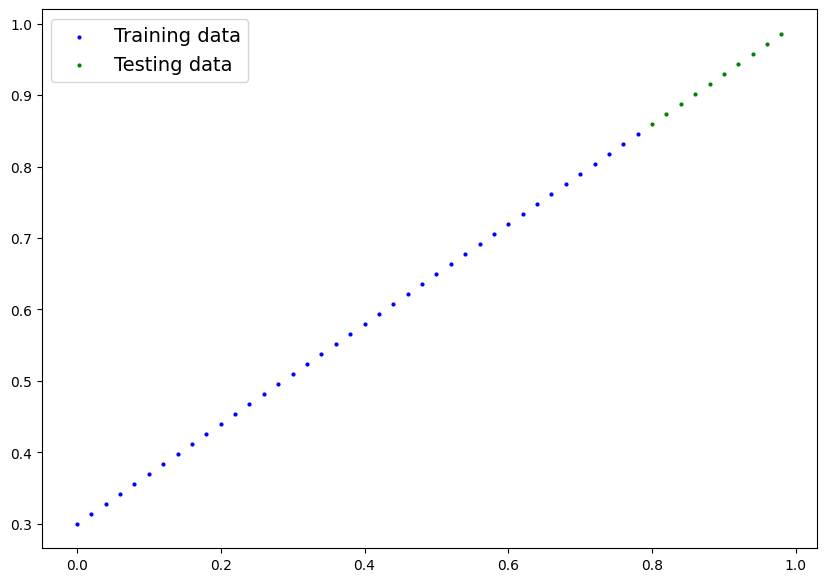

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]])),
              ('linear_layer.bias', tensor([0.2018]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
epochs = 1000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Train
  model_1.train()

  train_preds = model_1(X_train)

  optimizer.zero_grad()

  loss = loss_fn(train_preds, y_train)

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.4566597044467926 | Test loss: 0.902740478515625
Epoch: 100 | Train loss: 0.1262269765138626 | Test loss: 0.3064868450164795
Epoch: 200 | Train loss: 0.09164690971374512 | Test loss: 0.2134605497121811
Epoch: 300 | Train loss: 0.057300865650177 | Test loss: 0.1334826797246933
Epoch: 400 | Train loss: 0.02296038530766964 | Test loss: 0.05281791836023331
Epoch: 500 | Train loss: 0.0034435198176652193 | Test loss: 0.007161492016166449
Epoch: 600 | Train loss: 0.0034435198176652193 | Test loss: 0.007161492016166449
Epoch: 700 | Train loss: 0.0034435198176652193 | Test loss: 0.007161492016166449
Epoch: 800 | Train loss: 0.0034435198176652193 | Test loss: 0.007161492016166449
Epoch: 900 | Train loss: 0.0034435198176652193 | Test loss: 0.007161492016166449


In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6943]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2988], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8542],
        [0.8681],
        [0.8820],
        [0.8959],
        [0.9097],
        [0.9236],
        [0.9375],
        [0.9514],
        [0.9653],
        [0.9792]], device='cuda:0')

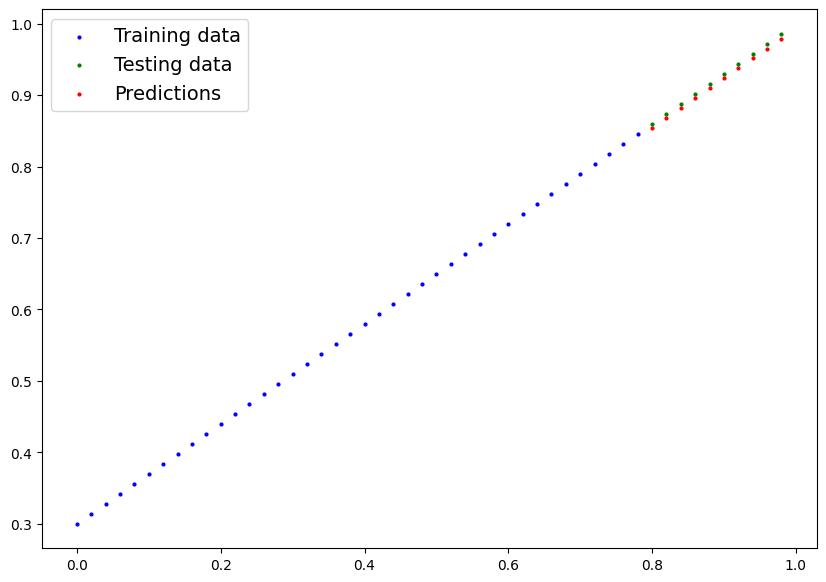

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
# Move all relevant tensors to CPU before plotting
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

In [ ]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 5, 0.02).unsqueeze(dim=1)
y = X * weight + bias

In [ ]:
train_split = (int) (0.8 * X.shape[0])
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

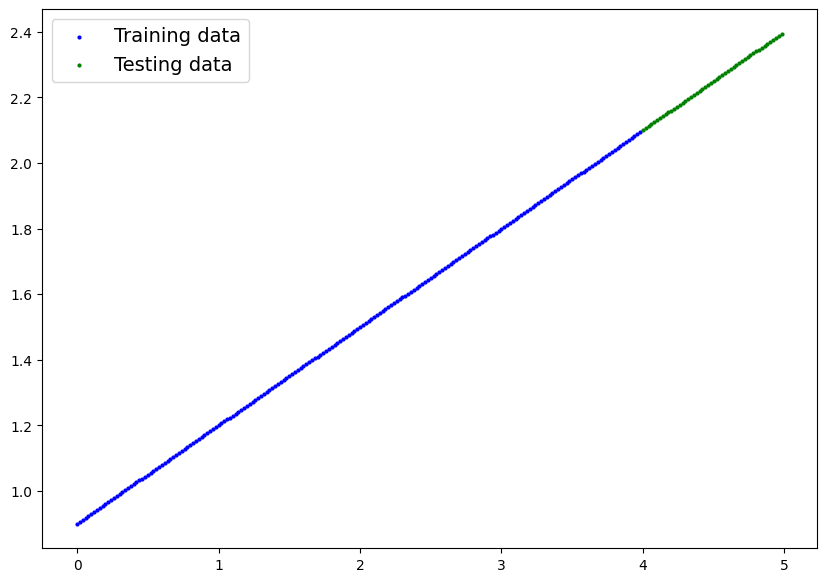

In [ ]:
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu())

In [ ]:
class LinReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

model_a = LinReg()
model_a.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4822]])),
             ('linear_layer.bias', tensor([-0.1412]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_a.parameters(), lr=0.01)

In [ ]:
epochs = 300
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
model_a.to(device)

for epoch in range(epochs):
  model_a.train()

  # do the forward pass
  train_pred = model_a(X_train)
  train_loss = loss_fn(train_pred, y_train)

  # zero the grad
  optimizer.zero_grad()

  #backwards pass
  train_loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model_a.eval()
    with torch.inference_mode():
      test_pred = model_a(X_test)
      test_loss = loss_fn(test_pred, y_test)
      print(f"Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.6786366701126099 | Test loss: 0.12381534278392792
Epoch: 20 | Train loss: 0.3798939287662506 | Test loss: 0.5553961992263794
Epoch: 40 | Train loss: 0.34890004992485046 | Test loss: 0.5368748903274536
Epoch: 60 | Train loss: 0.31830936670303345 | Test loss: 0.49436357617378235
Epoch: 80 | Train loss: 0.2877287268638611 | Test loss: 0.4465675950050354
Epoch: 100 | Train loss: 0.25714805722236633 | Test loss: 0.3987715542316437
Epoch: 120 | Train loss: 0.22656749188899994 | Test loss: 0.3509754538536072
Epoch: 140 | Train loss: 0.19598685204982758 | Test loss: 0.30318111181259155
Epoch: 160 | Train loss: 0.16540612280368805 | Test loss: 0.2553867995738983
Epoch: 180 | Train loss: 0.13482525944709778 | Test loss: 0.2075928896665573
Epoch: 200 | Train loss: 0.1042444035410881 | Test loss: 0.15979894995689392
Epoch: 220 | Train loss: 0.07366354018449783 | Test loss: 0.11200502514839172
Epoch: 240 | Train loss: 0.04308267682790756 | Test loss: 0.06421110779047012
Epo

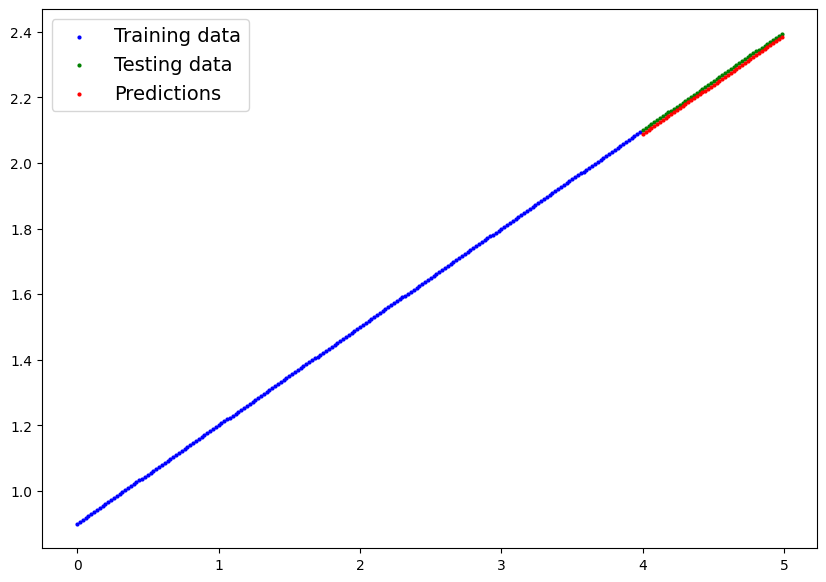

In [ ]:
model_a.eval()
with torch.inference_mode():
  test_pred = model_a(X_test)
  plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=test_pred.cpu())

In [ ]:
model_a.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2998]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8900], device='cuda:0'))])